In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("kc_house_data.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530.0,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310.0,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020.0,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600.0,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
# Introduce and Handle Missing Data: The original dataset is clean. Real world data
# is not. To simulate this, randomly introduce approximately 5% missing values into
# the sqft_lot and bathrooms columns. You'll need to devise an imputation strategy
# for these later in your pipeline
np.random.seed(42)
sizeToRemove=int(len(df)*0.05) #1080
sizeToRemove
null_index=np.random.choice(df.index,size=sizeToRemove,replace=False)
df.loc[null_index,['sqft_lot','bathrooms']]=np.nan
df.isnull().sum()

# removed 5 % values from dataset
# df['sqft_lot'].mean()
# df['sqft_lot'].median()


id                  0
date                0
price               0
bedrooms            0
bathrooms        1080
sqft_living         0
sqft_lot         1080
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          2
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

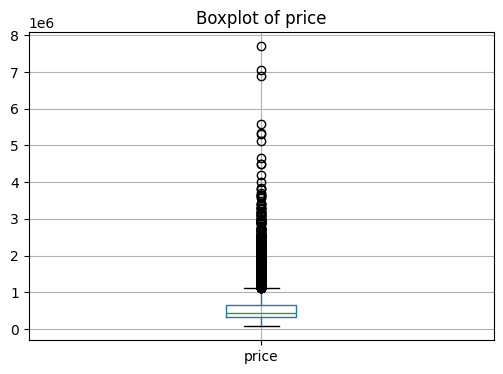

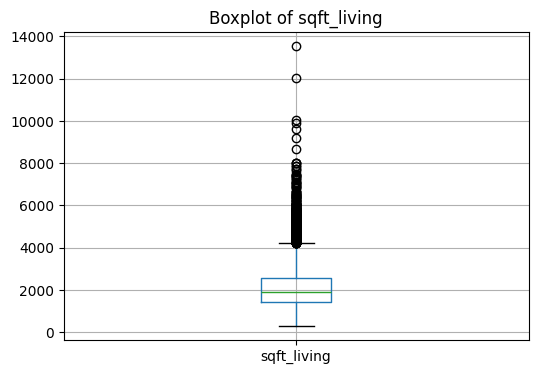

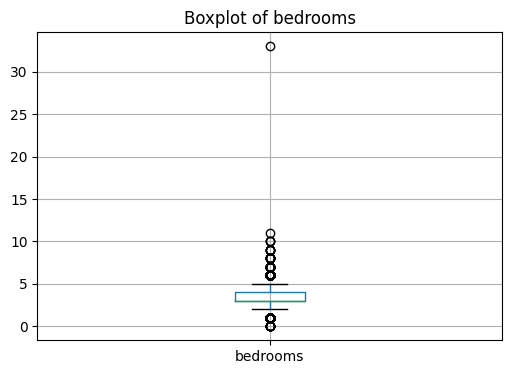

In [4]:
# Outlier Detection and Handling:
# ○ Create boxplots for price, sqft_living, and bedrooms.
# ○ Identify and remove egregious outliers. A common rule is to remove
# data points that lie beyond 1.5timesIQR (Interquartile Range) from the
# first or third quartile. Justify your outlier removal strategy. For
# instance, does a house with 33 bedrooms seem plausible?
# fig1=df[["price"]]
# fig2=df[["sqft_living"]]
# fig3=df[["bedrooms"]]
features=["price","sqft_living","bedrooms"]
for col in features:
    plt.figure(figsize=(6,4))
    df.boxplot(column=[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# plotted box plots
def remove_outliers(df,col):
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    IQR=q3-q1
    upperlimit=q3+IQR*1.5
    lowerlimit=q1-IQR*1.5
    return df[(df[col]>=lowerlimit) & (df[col]<=upperlimit)]

for i in features:
    df=remove_outliers(df,i)




In [5]:
# # fixing missing values
# df['sqft_lot']=df['sqft_lot'].fillna(df['sqft_lot'].median)
# df['bathrooms']=df['bathrooms'].fillna(df['bathrooms'].median)
# df.isnull().sum()

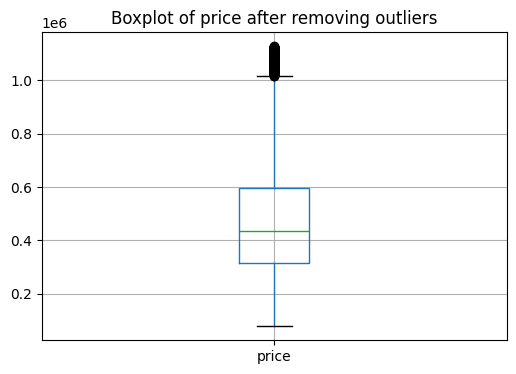

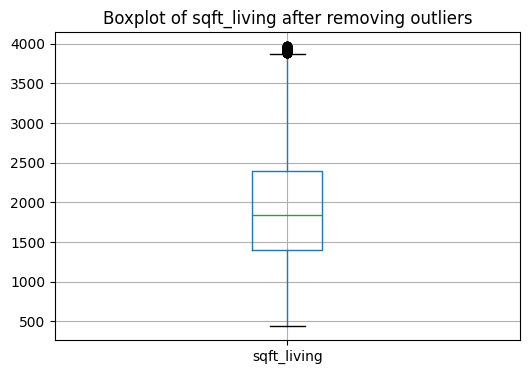

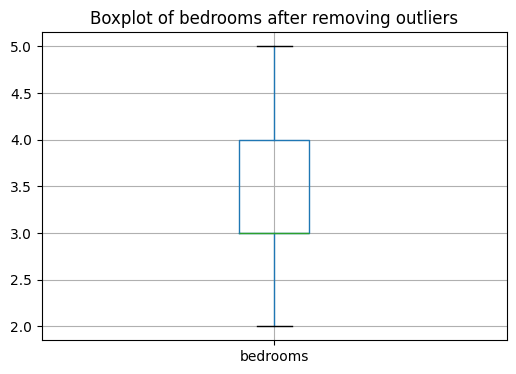

In [6]:
features=["price","sqft_living","bedrooms"]
for col in features:
    plt.figure(figsize=(6,4))
    df.boxplot(column=[col])
    plt.title(f"Boxplot of {col} after removing outliers")
    plt.show()

# df_cleaned

In [7]:
# 2. Advanced Feature Engineering: Create the following new features, as they
# often provide more predictive power than raw data:
# ○ Date-Based Features: Do not drop the date column. Convert it to a
# datetime object and engineer the following:
# ■ sale_year: The year the house was sold.
# ■ sale_month: The month the house was sold.
# ■ house_age: The age of the house at the time of sale (sale_year -
# yr_built).
df['date']=pd.to_datetime(df['date'])
# converted to date time object 
df['sale_year']=df['date'].dt.year
# converted to year
df['sale_month']=df['date'].dt.month
# month of house being sold
df['house_age']=df['sale_year']-df['yr_built']
# house age
df[['sale_year','sale_month','house_age','date']]


,sale_year,sale_month,house_age,date
0,2014,10,59,2014-10-13
1,2014,12,63,2014-12-09
2,2015,2,82,2015-02-25
3,2014,12,49,2014-12-09
4,2015,2,28,2015-02-18
...,...,...,...,...
21608,2014,5,5,2014-05-21
21609,2015,2,1,2015-02-23
21610,2014,6,5,2014-06-23
21611,2015,1,11,2015-01-16


In [8]:
# Renovation Status:
# ■ was_renovated: A binary feature (1 if yr_renovated is not 0,
# else 0).
# ■ age_since_renovation: Years since renovation. If never
# renovated, this could be the same as house_age. Think about the
# best way to handle this

df['was_renovated']=df['yr_renovated'].apply(lambda x:1 if x!=0 else 0)

df['age_since_renovation']=df.apply(
    lambda r : r['sale_year']-r['yr_renovated'] if r['was_renovated'] ==1 
    else r['house_age'],
    axis=1
)
# df['was_renovated']
# df['age_since_renovation']
df[['age_since_renovation','was_renovated','yr_renovated','house_age']]

,age_since_renovation,was_renovated,yr_renovated,house_age
0,59,0,0,59
1,23,1,1991,63
2,82,0,0,82
3,49,0,0,49
4,28,0,0,28
...,...,...,...,...
21608,5,0,0,5
21609,1,0,0,1
21610,5,0,0,5
21611,11,0,0,11


In [9]:
# ○ Ratio Features: Create at least two insightful ratio features. For
# example:
# ■ sqft_living_per_floor: sqft_living / floors. (Handle cases where
# floors might be 0).
# ■ bath_per_bed: bathrooms / bedrooms. (Handle cases where
# bedrooms might be 0).
df['sqft_living_per_floor']=df.apply(
    lambda df:
      df['sqft_living']/df['floors'] if df['floors'] > 0 else df['sqft_living']
      ,axis=1)
df['bath_per_bed']=df.apply(
    lambda df:
    df['bathrooms']/df['bedrooms'] if df['bedrooms'] > 0 else df['bathrooms'],
    axis=1
)
df['sqft_lot_per_sqft_living']=df.apply(
    lambda df:
    df['sqft_lot']/df['sqft_living'] if df['sqft_living'] > 0 else df['sqft_living'],
    axis=1
)

df[['sqft_living_per_floor','bath_per_bed','sqft_lot_per_sqft_living']].head()

,sqft_living_per_floor,bath_per_bed,sqft_lot_per_sqft_living
0,1180.0,0.333333,4.788136
1,1285.0,0.750000,2.817899
2,770.0,0.500000,12.987013
3,1960.0,0.750000,2.551020
4,1680.0,0.666667,4.809524


In [10]:
# Task 2: Build a Sophisticated Preprocessing Pipeline
# This is the core of the assignment. Instead of manually applying transformations,
# you must automate the process using sklearn.pipeline.Pipeline and
# sklearn.compose.ColumnTransformer. This approach is less error prone and is
# standard practice in production environments.

# 1. Identify Feature Types: After your feature engineering in Task 1, categorize
# your final columns into three groups:
# ○ Numerical Features: Continuous variables that need imputation and
# scaling (e.g., sqft_living, house_age, sqft_lot).
# ○ Categorical Features: Features that should be treated as categories, not
# numbers (e.g., zipcode).
# ○ Passthrough Features: Features you believe don't need scaling or
# encoding but are still useful (e.g., grade, condition, was_renovated).
numerical_features=['bedrooms','bathrooms','sqft_living','sqft_living','sqft_lot','floors','lat','long','sqft_living15','sqft_lot15',
                    'house_age','age_since_renovation','sqft_living_per_floor','bath_per_bed','sqft_lot_per_sqft_living']
categorical_features=['view','waterfront','zipcode']
passthrough_features=['grade','condition','was_renovated']
df.columns
# df

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'sale_year', 'sale_month',
       'house_age', 'was_renovated', 'age_since_renovation',
       'sqft_living_per_floor', 'bath_per_bed', 'sqft_lot_per_sqft_living'],
      dtype='object')

In [11]:
# # 2. Create Preprocessing Pipelines for Each Type:
#     # ○ Numerical Pipeline: Create a Pipeline that first imputes missing values
#     # (using SimpleImputer with a median strategy) and then scales the data
#     # (using StandardScaler).
#     #  Categorical Pipeline: Create a Pipeline that applies OneHotEncoder to
#     # the zipcode column. Set handle_unknown='ignore' to prevent errors if
#     # the test set contains a zipcode not seen in the training set.

# 3. Combine Pipelines with ColumnTransformer:
# ○ Use ColumnTransformer to apply your numerical pipeline to the
# numerical columns, your categorical pipeline to the categorical
# columns, and specify 'passthrough' for the passthrough columns.
# ○ This ColumnTransformer will be the first step in your final modeling
# pipeline.


In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

numerical_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
])

categorical_pipeline=Pipeline([
    ('encoder',OneHotEncoder(handle_unknown='ignore'))

])

# combined
preprocessor=ColumnTransformer([
    ('numerical',numerical_pipeline,numerical_features),
    ('categorical',categorical_pipeline,categorical_features),
    ('passthrough','passthrough',passthrough_features)
])
# passthrough don't need to further process

X=df.drop('price',axis=1)
y=df['price']
# y
# X

In [13]:
# Task 3: Model Training and Hyperparameter Tuning
# Now, find the best possible model by tuning its hyperparameters.
# 1. Select Candidate Models: Based on the results from the original notebook,
# choose the top 3 performing models (e.g., Gradient Boosting, XGBoost,
# Random Forest).


In [14]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
models = {
    # "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Support Vector Regressor": SVR(kernel='rbf'),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
}

In [15]:
from sklearn.model_selection import GridSearchCV,train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [19]:
# Create a Final Pipeline: For each of the three models, create a main Pipeline that
# chains your ColumnTransformer (from Task 2) and the model estimator. For
# example:
# Python
# from sklearn.pipeline import Pipeline
# from sklearn.ensemble import RandomForestRegressor
# # preprocessor is your ColumnTransformer from Task 2
# final_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
# ('regressor', RandomForestRegressor(random_state=42))])

# rf_pipeline = Pipeline(steps=[
#     ('preprocessor',preprocessor),
#     ('regressor',RandomForestRegressor(random_state=42))
# ]
# )

svr_pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('regressor',SVR())
])

gb_pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('regressor',GradientBoostingRegressor(random_state=42))
]
)

xgb_pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('regressor',XGBRegressor(random_state=42,objective="reg:squarederror"))
]
)

# training model
# rf_pipeline.fit(X_train,y_train)
# gb_pipeline.fit(X_train,y_train)
# xgb_pipeline.fit(X_train,y_train)

In [20]:
# 2. Hyperparameter Tuning with GridSearchCV:
# ○ For each of your three final pipelines, define a parameter grid
# (param_grid) to search. For the regressor step, remember to prefix the
# parameter names with regressor__ (e.g., 'regressor__n_estimators':
# [100, 200]).
# ○ Choose at least two parameters to tune for each model.
# ○ Use GridSearchCV with 3 fold cross-validation (cv=3) to find the best
# set of hyperparameters for each model.
# ○ Train GridSearchCV on the full training data. It will automatically
# handle applying the preprocessing pipeline correctly during
# cross-validation.

from sklearn.model_selection import GridSearchCV

# # ------------------------------
# # Random Forest
# # ------------------------------
# rf_param_grid = {
#     'regressor__n_estimators': [100, 200, 300],
#     'regressor__max_depth': [None, 10, 20],
# }

svr_param_grid = {
    'regressor__C': [0.1, 1, 10],
    'regressor__kernel': ['linear', 'rbf'],
}

svr_grid = GridSearchCV(
    svr_pipeline,
    param_grid=svr_param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=2
)
svr_grid.fit(X_train, y_train)
print("Best SVR Params:", svr_grid.best_params_)
print("Best SVR Score:", svr_grid.best_score_)


# ------------------------------
# Gradient Boosting
# ------------------------------
gb_param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__learning_rate': [0.05, 0.1, 0.2],
    'regressor__max_depth': [3, 5]
}

gb_grid = GridSearchCV(
    gb_pipeline,
    param_grid=gb_param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=2
)

gb_grid.fit(X_train, y_train)
print("Best GB Params:", gb_grid.best_params_)
print("Best GB Score:", gb_grid.best_score_)


# ------------------------------
# XGBoost
# ------------------------------
xgb_param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__learning_rate': [0.05, 0.1, 0.2],
    'regressor__max_depth': [3, 5, 7]
}

xgb_grid = GridSearchCV(
    xgb_pipeline,
    param_grid=xgb_param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=2
)

xgb_grid.fit(X_train, y_train)
print("Best XGB Params:", xgb_grid.best_params_)
print("Best XGB Score:", xgb_grid.best_score_)


Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best SVR Params: {'regressor__C': 10, 'regressor__kernel': 'linear'}
Best SVR Score: 0.524517746368994
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best GB Params: {'regressor__learning_rate': 0.1, 'regressor__max_depth': 5, 'regressor__n_estimators': 200}
Best GB Score: 0.8670256544091653
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best XGB Params: {'regressor__learning_rate': 0.1, 'regressor__max_depth': 5, 'regressor__n_estimators': 200}
Best XGB Score: 0.8670520185780681


In [ ]:
# Task 4: Evaluation and Interpretation
# Finally, evaluate your best model and interpret its results.
# 1. Final Evaluation:
# ○ Identify the best overall model and its parameters from your
# GridSearchCV results.
# ○ Evaluate this best tuned pipeline on the test set.
# ○ Report the final R2 score, Mean Absolute Error (MAE), and Root
# Mean Squared Error (RMSE).

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Pick the best model (example: Gradient Boosting)
best_model = gb_grid.best_estimator_  # Or xgb_grid / svr_grid depending on above

# Predict on test data
y_pred = best_model.predict(X_test)

# Calculate metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Final Test R2 Score:", r2)
print("Final Test MAE:", mae)
print("Final Test RMSE:", rmse)


Final Test R2 Score: 0.8717282782573665
Final Test MAE: 52213.170438295805
Final Test RMSE: 73232.23795672988


In [33]:
regressor=best_model.named_steps['regressor']
feature_imp=regressor.feature_importances_

feat_imp_dif=pd.DataFrame({
    'feature':feature_imp,
    'feature_importance':feature_imp
}).sort_values(by='feature_importance',ascending=False)

Percentage Improvement in RMSE: 65.09 %


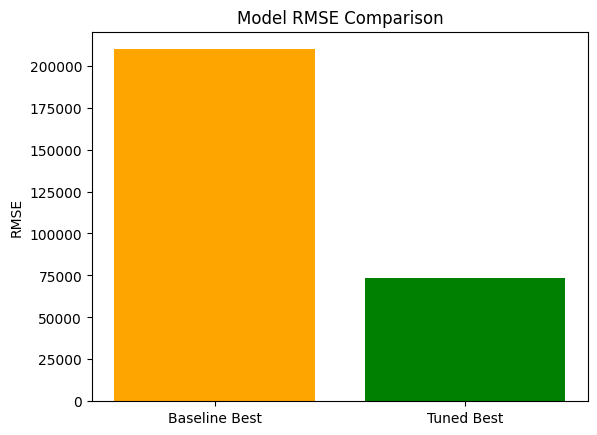

In [23]:
# Performance Comparison:
# ○ Create a table or bar chart comparing the RMSE of your final, tuned
# model to the RMSE of the best model from the original notebook.
# ○ Calculate and report the percentage improvement in RMSE.
# 3. Feature Importance:
# ○ If your best model was a tree based model (like RandomForest or
# XGBoost), extract and plot the feature importances.
# ○ Important: The feature names from the OneHotEncoder will be
# generic. You'll need to retrieve the original categorical feature names
# # to make your plot interpretable.
# ○ Write a brief summary analyzing the top 5 most important features.
# Do they make sense? Are any of your engineered features in the top
# 5?


rmse_baseline = 209786.255677   # og
rmse_tuned = 73232.23795672988      # my model

comparison = pd.DataFrame({
    "Model": ["Baseline Best", "Tuned Best"],
    "RMSE": [rmse_baseline, rmse_tuned]
})


improvement = ((rmse_baseline - rmse_tuned) / rmse_baseline) * 100
print("Percentage Improvement in RMSE:", round(improvement, 2), "%")


plt.bar(comparison["Model"], comparison["RMSE"], color=["orange", "green"])
plt.ylabel("RMSE")
plt.title("Model RMSE Comparison")
plt.show()


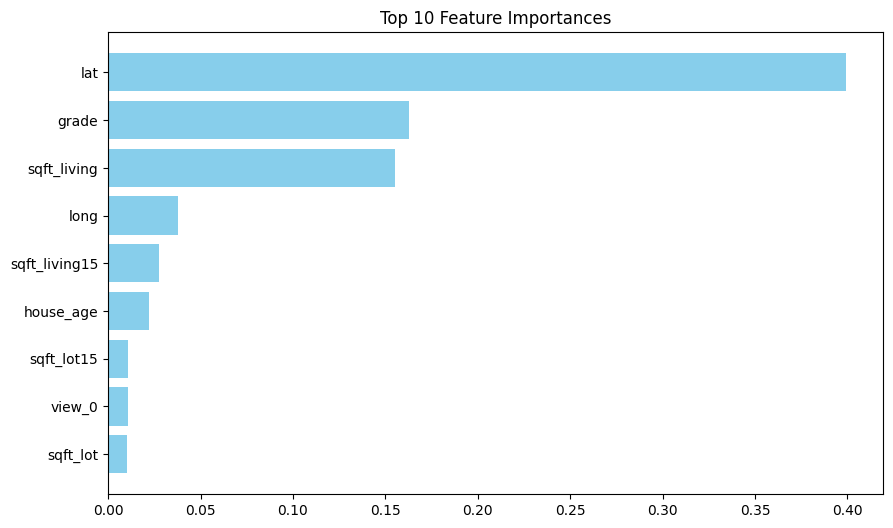

        Feature  Importance
6           lat    0.399373
92        grade    0.162577
2   sqft_living    0.155442
3   sqft_living    0.100351
7          long    0.037922


In [38]:
# Get feature names from preprocessing
feature_names_num = numerical_features
feature_names_cat = best_model.named_steps['preprocessor']\
    .transformers_[1][1]\
    .named_steps['encoder']\
    .get_feature_names_out(categorical_features)

feature_names = np.concatenate([feature_names_num, feature_names_cat, passthrough_features])

# Extract feature importances
importances = best_model.named_steps['regressor'].feature_importances_

# Put into dataframe
feat_imp = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Plot
plt.figure(figsize=(10,6))
plt.barh(feat_imp["Feature"][:10], feat_imp["Importance"][:10], color="skyblue")
plt.gca().invert_yaxis()
plt.title("Top 10 Feature Importances")
plt.show()

# Top 5 features
print(feat_imp.head())


In [40]:
print('''
The top 5 important features show that:

- Latitude and longitude: The location of a house plays the biggest role in deciding its price. 
- Square footage of living space: Bigger houses generally cost more, which makes sense.
- Grade: This captures the overall quality and design of the house. Better construction usually means higher prices.
- Sqft_living15: This tells us about the size of nearby houses. If the neighborhood has larger homes, prices in that area also go up.

Interestingly, none of the top 5 features come from the engineered ones we created.
''')



The top 5 important features show that:

- Latitude and longitude: The location of a house plays the biggest role in deciding its price. 
- Square footage of living space: Bigger houses generally cost more, which makes sense.
- Grade: This captures the overall quality and design of the house. Better construction usually means higher prices.
- Sqft_living15: This tells us about the size of nearby houses. If the neighborhood has larger homes, prices in that area also go up.

Interestingly, none of the top 5 features come from the engineered ones we created.

